In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/csgo-matchmaking-damage/de_mirage.png
/kaggle/input/csgo-matchmaking-damage/de_coast.png
/kaggle/input/csgo-matchmaking-damage/de_santorini.png
/kaggle/input/csgo-matchmaking-damage/map_data.csv
/kaggle/input/csgo-matchmaking-damage/esea_meta_demos.part1.csv
/kaggle/input/csgo-matchmaking-damage/mm_grenades_demos.csv
/kaggle/input/csgo-matchmaking-damage/esea_master_dmg_demos.part2.csv
/kaggle/input/csgo-matchmaking-damage/de_season.png
/kaggle/input/csgo-matchmaking-damage/de_inferno.png
/kaggle/input/csgo-matchmaking-damage/de_overpass.png
/kaggle/input/csgo-matchmaking-damage/de_royal.png
/kaggle/input/csgo-matchmaking-damage/de_nuke.png
/kaggle/input/csgo-matchmaking-damage/esea_master_kills_demos.part2.csv
/kaggle/input/csgo-matchmaking-damage/esea_master_grenades_demos.part1.csv
/kaggle/input/csgo-matchmaking-damage/mm_master_demos.csv
/kaggle/input/csgo-matchmaking-damage/de_empire.png
/kaggle/input/csgo-matchmaking-damage/de_new_nuke.png
/kaggle/input/csgo-matchma

In [2]:
mm_data = pd.read_csv('/kaggle/input/csgo-matchmaking-damage/mm_master_demos.csv')
mm_data


,Unnamed: 0,file,map,date,round,tick,seconds,att_team,vic_team,att_side,...,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,0,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8482,133.0582,Team 1,Team 2,CounterTerrorist,...,76561198123082770,17,1473.847,1351.358,662.170,772.748,PISTOL_ROUND,2950,3850,16.0
1,1,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8600,134.9023,Team 1,Team 2,CounterTerrorist,...,76561198051040004,17,-1211.723,1060.813,-1184.006,1153.343,PISTOL_ROUND,2950,3850,16.0
2,2,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8610,135.0586,Team 2,Team 1,Terrorist,...,76561198223006752,16,-1153.584,1163.131,-1198.015,1050.423,PISTOL_ROUND,2950,3850,16.0
3,3,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8624,135.2774,Team 1,Team 2,CounterTerrorist,...,76561198051040004,17,-1173.053,1044.365,-1141.785,1190.089,PISTOL_ROUND,2950,3850,16.0
4,4,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8632,135.4024,Team 2,Team 1,Terrorist,...,76561198223006752,16,-1142.522,1200.967,-1157.690,1050.702,PISTOL_ROUND,2950,3850,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955461,837,003235042038193848574_1296145074.dem,de_cbble,09/28/2017 2:08:52 PM,27,194142,3033.9980,Team 1,Team 2,Terrorist,...,76561198209959781,14,-2744.494,-1320.516,-1777.171,-1431.703,NORMAL,29250,28950,12.0
955462,838,003235042038193848574_1296145074.dem,de_cbble,09/28/2017 2:08:52 PM,27,194258,3035.8110,Team 1,Team 2,Terrorist,...,76561198209959781,14,-2643.451,-1579.216,-1778.660,-1422.033,NORMAL,29250,28950,12.0
955463,839,003235042038193848574_1296145074.dem,de_cbble,09/28/2017 2:08:52 PM,27,194270,3035.9980,Team 1,Team 2,Terrorist,...,76561198209959781,14,-2643.451,-1579.216,-1792.069,-1381.254,NORMAL,29250,28950,12.0
955464,840,003235042038193848574_1296145074.dem,de_cbble,09/28/2017 2:08:52 PM,27,194284,3036.2170,Team 1,Team 2,Terrorist,...,76561198209959781,14,-2643.451,-1579.216,-1822.041,-1338.798,NORMAL,29250,28950,12.0


In [3]:
observe_map = 'de_inferno'
inferno = mm_data[(mm_data.map == observe_map) & ((mm_data.round_type =='PISTOL_ROUND') | (mm_data.round_type =='NORMAL'))]
inferno.head()

,Unnamed: 0,file,map,date,round,tick,seconds,att_team,vic_team,att_side,...,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
1318,0,003201817199836659927_0341783733.dem,de_inferno,09/28/2017 8:44:21 PM,1,7744,121.4771,Team 2,Team 1,Terrorist,...,76561198356327243,12,909.8429,212.5864,862.5731,572.3798,PISTOL_ROUND,3650,3800,12.0
1319,1,003201817199836659927_0341783733.dem,de_inferno,09/28/2017 8:44:21 PM,1,7752,121.6021,Team 2,Team 1,Terrorist,...,76561198356327243,12,901.6891,211.0029,869.1266,576.2071,PISTOL_ROUND,3650,3800,12.0
1320,2,003201817199836659927_0341783733.dem,de_inferno,09/28/2017 8:44:21 PM,1,7760,121.7272,Team 2,Team 1,Terrorist,...,76561198356327243,12,900.5918,210.8088,878.0390,579.0375,PISTOL_ROUND,3650,3800,12.0
1321,3,003201817199836659927_0341783733.dem,de_inferno,09/28/2017 8:44:21 PM,1,7766,121.8209,Team 2,Team 1,Terrorist,...,76561198297418868,12,664.6514,2001.0140,905.5052,2770.6560,PISTOL_ROUND,3650,3800,12.0
1322,4,003201817199836659927_0341783733.dem,de_inferno,09/28/2017 8:44:21 PM,1,7778,122.0085,Team 2,Team 1,Terrorist,...,76561198356327243,12,921.4374,213.9812,878.0858,579.7472,PISTOL_ROUND,3650,3800,12.0


In [4]:
inferno.columns

Index(['Unnamed: 0', 'file', 'map', 'date', 'round', 'tick', 'seconds',
       'att_team', 'vic_team', 'att_side', 'vic_side', 'hp_dmg', 'arm_dmg',
       'is_bomb_planted', 'bomb_site', 'hitbox', 'wp', 'wp_type', 'award',
       'winner_team', 'winner_side', 'att_id', 'att_rank', 'vic_id',
       'vic_rank', 'att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y',
       'round_type', 'ct_eq_val', 't_eq_val', 'avg_match_rank'],
      dtype='object')

In [5]:
# Code from billfreeman44 | See his kernel : https://www.kaggle.com/billfreeman44/finding-classic-smokes-by-t-side-on-mirage 
# Used to convert Dataset positions to positions on the radar
map_coord = pd.read_csv('../input/map-data/datasets_2644_102041_map_data.csv')


startX = map_coord.iloc[3]['StartX']
endX = map_coord.iloc[3]['EndX']
resX = map_coord.iloc[3]['ResX']

startY = map_coord.iloc[3]['StartY']
endY = map_coord.iloc[3]['EndY']
resY = map_coord.iloc[3]['ResY']


startX,startY,endX,endY,resY,resX

(-1960, -1062, 2797, 3800, 1024, 1024)

In [6]:
# Code from billfreeman44 | See his kernel : https://www.kaggle.com/billfreeman44/finding-classic-smokes-by-t-side-on-mirage 
# Used to convert Dataset positions to positions on the radar
# Keep in mind that the startX, endX resX, startY, endY, resY are specific to mirage, coordinates for each map are available in the dataset

def pointx_to_resolutionx(xinput,startX=startX,endX=endX,resX=resX):
    sizeX=endX-startX
    if startX < 0:
        xinput += startX *(-1.0)
    else:
        xinput += startX
    xoutput = float((xinput / abs(sizeX)) * resX);
    return xoutput

def pointy_to_resolutiony(yinput,startY=startY,endY=endY,resY=resY):
    sizeY=endY-startY
    if startY < 0:
        yinput += startY *(-1.0)
    else:
        yinput += startY
    youtput = float((yinput / abs(sizeY)) * resY);
    return resY-youtput

# Convert the data to radar positions
inferno['attacker_mapX'] = inferno['att_pos_x'].apply(pointx_to_resolutionx)#calculating attacker's position
inferno['attacker_mapY'] = inferno['att_pos_y'].apply(pointy_to_resolutiony)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


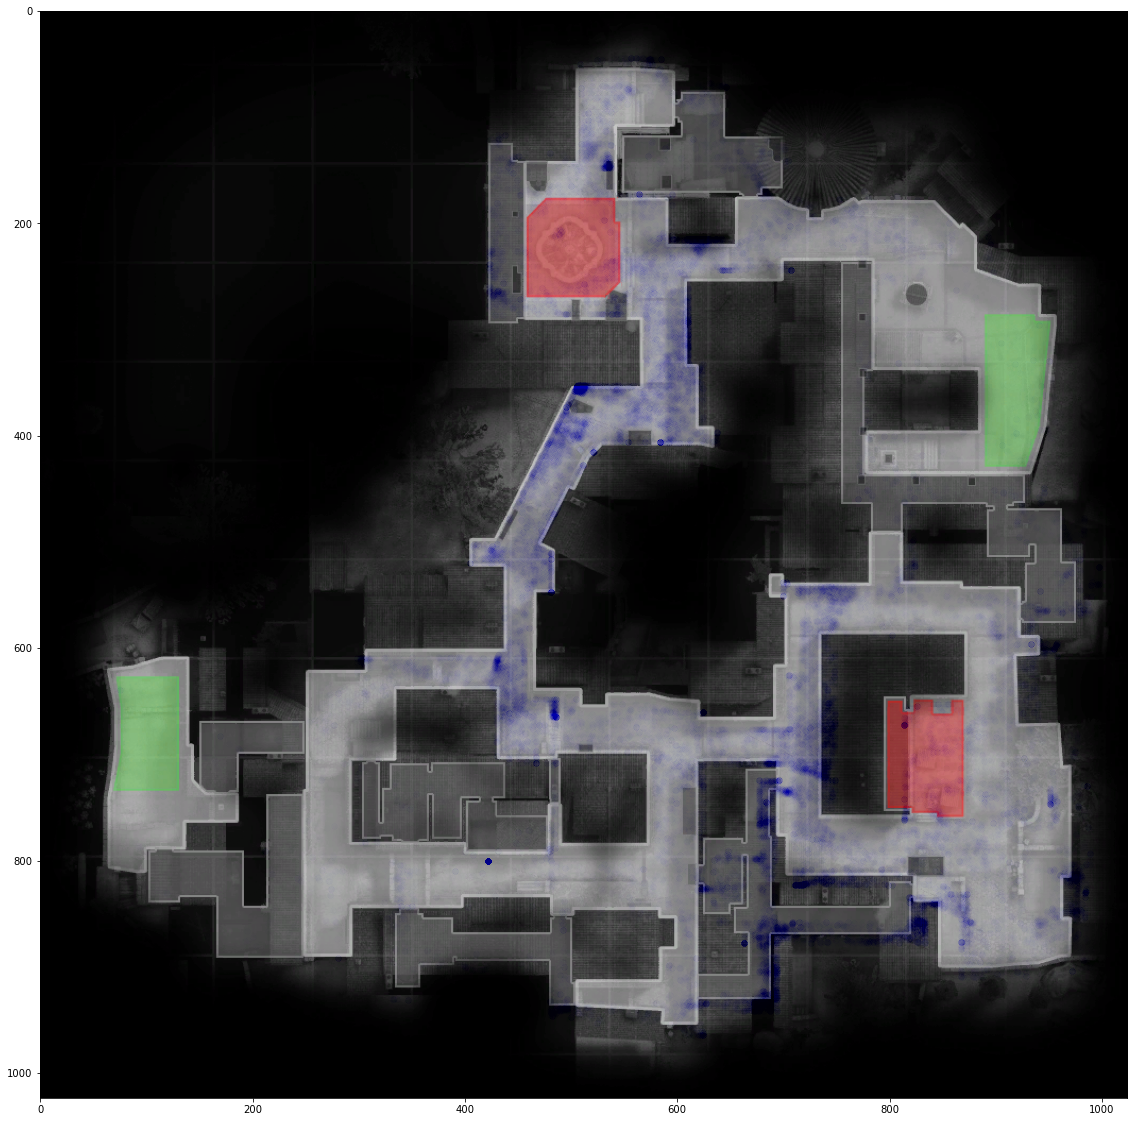

In [12]:
#Ct defense when no bomb plant
ct_plot = inferno[(inferno.is_bomb_planted ==False) & (inferno.att_side == 'CounterTerrorist') & (inferno.winner_side=='CounterTerrorist')]
map_image = plt.imread('/kaggle/input/csgo-matchmaking-damage/de_inferno.png')
plt.figure(figsize=(20,20))
im = plt.imshow(map_image)
im = plt.scatter(inferno['attacker_mapX'],inferno['attacker_mapY'],alpha = 0.005, c= 'blue')

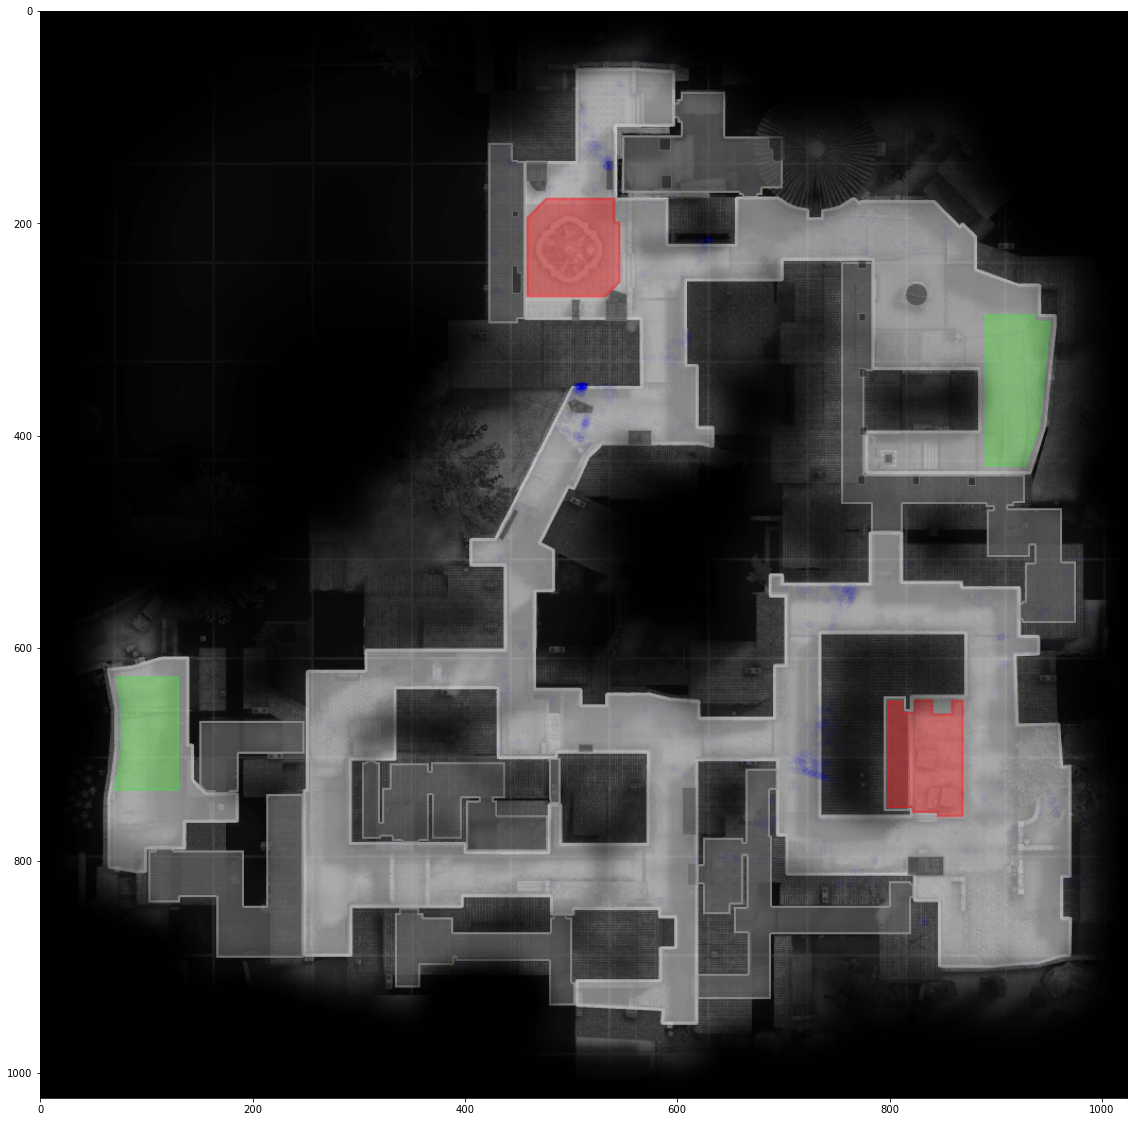

In [10]:
ct_data_awp = inferno[(inferno.is_bomb_planted == False) & (inferno.att_side == 'CounterTerrorist') & (inferno.wp == 'AWP') & (inferno.winner_side == 'CounterTerrorist')]
 
im = plt.imread('/kaggle/input/csgo-matchmaking-damage/de_inferno.png')
plt.figure(figsize=(20,20))
t = plt.imshow(im)
t = plt.scatter(ct_data_awp['attacker_mapX'], ct_data_awp['attacker_mapY'],alpha=0.025,c='blue')

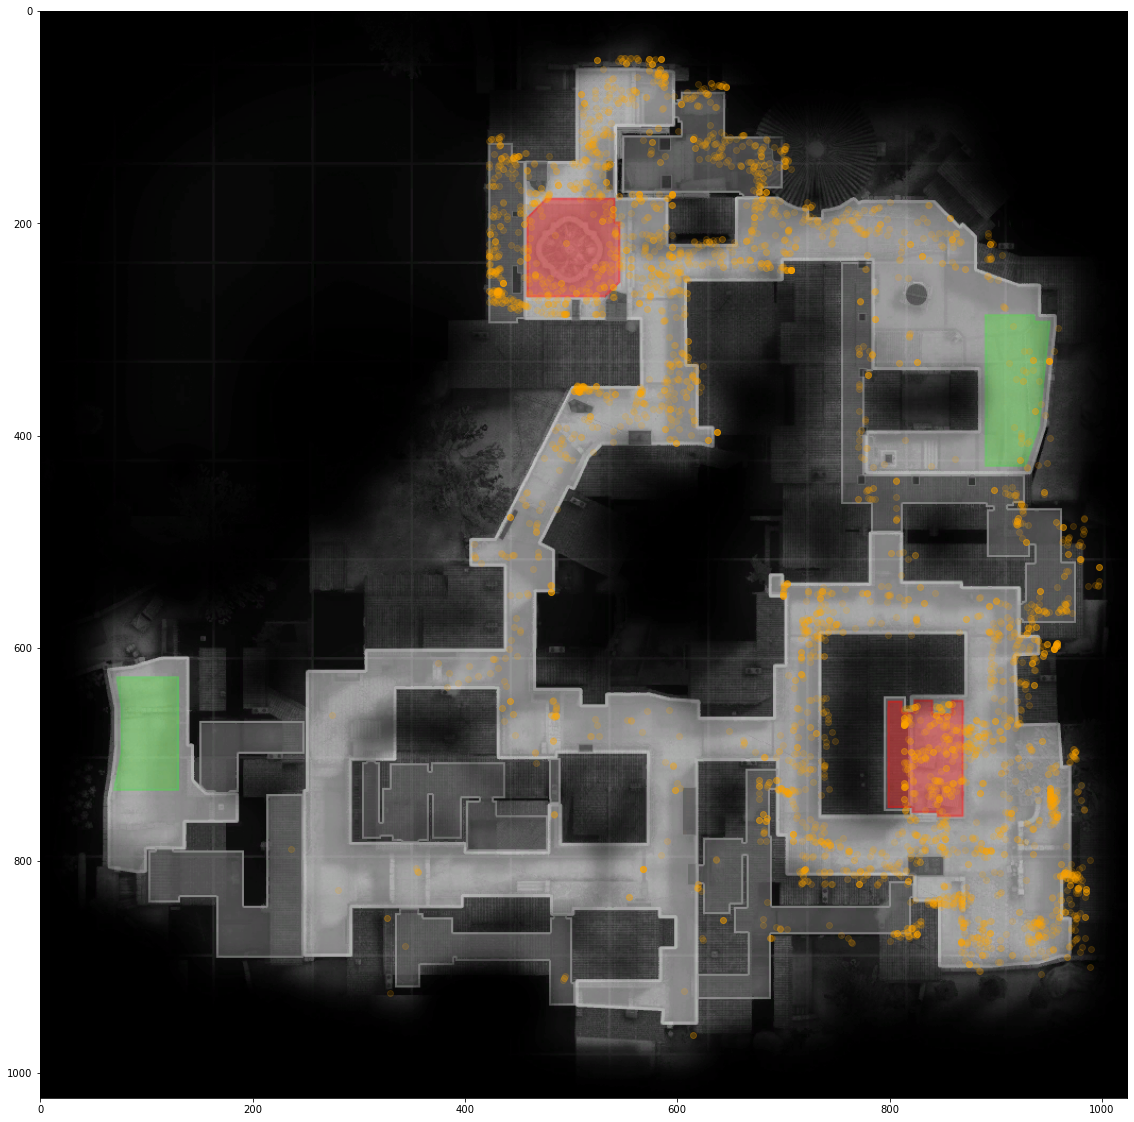

In [47]:
t_data = inferno[(inferno.is_bomb_planted == True) & (inferno.att_side == 'Terrorist')  & (inferno.winner_side == 'Terrorist')]
 
im = plt.imread('/kaggle/input/csgo-matchmaking-damage/de_inferno.png')
plt.figure(figsize=(20,20))
t = plt.imshow(im)
t = plt.scatter(t_data['attacker_mapX'], t_data['attacker_mapY'],alpha=0.05,c='orange')

1318      True
1319      True
1320      True
1321      True
1322      True
          ... 
951123    True
951124    True
951125    True
951126    True
951127    True
Name: bomb_site, Length: 64035, dtype: bool